# Знакомство с данными. Базовый анализ и расширение данных

 - **Данные о клиенте и таксопарке:**  
  
`id` — уникальный идентификатор поездки;  
`vendor_id` — уникальный идентификатор поставщика услуг (таксопарка), связанного с записью поездки.  
  
 - **Временные характеристики:**  
   
`pickup_datetime` — дата и время, когда был включён счётчик поездки;  
`dropoff_datetime` — дата и время, когда счётчик был отключён.  
  
    
- **Географическая информация:**   
  
`pickup_longitude` — долгота, на которой был включён счётчик;  
`pickup_latitude` — широта, на которой был включён счётчик;  
`dropoff_longitude` — долгота, на которой счётчик был отключён;  
`dropoff_latitude` — широта, на которой счётчик был отключён.  
  
    
 - **Прочие признаки:** 
   
`passenger_count` — количество пассажиров в транспортном средстве (введённое водителем значение);  
`store_and_fwd_flag` — флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед   отправкой поставщику (Y — хранить и пересылать, N — не хранить и не пересылать поездку).  
  
 - **Целевой признак:** 
   
`trip_duration` — продолжительность поездки в секундах.

# Импорт библиотек

In [207]:
#импорт нужных библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection
from scipy.stats import normaltest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [3]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import median_absolute_error

# Загрузка датасета

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [6]:
#инфо о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# 2. Знакомство с данными. Базовый анализ и расширение данных

## 2.1 работа с датами

In [7]:
#изменение формата в датах
df.pickup_datetime=pd.to_datetime(df.pickup_datetime, utc=True, format='%Y-%m-%d %H:%M:%S')
df.dropoff_datetime=pd.to_datetime(df.dropoff_datetime, utc=True, format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype              
---  ------              --------------    -----              
 0   id                  1458644 non-null  object             
 1   vendor_id           1458644 non-null  int64              
 2   pickup_datetime     1458644 non-null  datetime64[ns, UTC]
 3   dropoff_datetime    1458644 non-null  datetime64[ns, UTC]
 4   passenger_count     1458644 non-null  int64              
 5   pickup_longitude    1458644 non-null  float64            
 6   pickup_latitude     1458644 non-null  float64            
 7   dropoff_longitude   1458644 non-null  float64            
 8   dropoff_latitude    1458644 non-null  float64            
 9   store_and_fwd_flag  1458644 non-null  object             
 10  trip_duration       1458644 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(4), int64(3), object(2)
memo

In [8]:
print('первая поездка: ',df.pickup_datetime.min())
print('последняя поездка: ',df.pickup_datetime.max())


первая поездка:  2016-01-01 00:00:17+00:00
последняя поездка:  2016-06-30 23:59:39+00:00


## 2.2 проверка дублирующихся строк и нулевых

In [9]:
#проверка дублирующихся строк
df[df.duplicated()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


In [10]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## 2.3. статистические характеристики некоторых признаков.

In [26]:
#Сколько уникальных таксопарков присутствует в данных?

print('всего 2 уникальных таксопарка в данных',df.vendor_id.value_counts())

всего 2 уникальных таксопарка в данных vendor_id
2    780302
1    678342
Name: count, dtype: int64


In [22]:
#Каково максимальное количество пассажиров?
print ('максимальное количество пассажиров  =  ', df.passenger_count.max())

максимальное количество пассажиров  =   9


In [23]:
#Чему равна средняя и медианная длительность поездки
print('медианное значение',df.trip_duration.median ())
print('максимальное значение',df.trip_duration.max())
print('минимальное значение',df.trip_duration.min())
print('среднее значение',df.trip_duration.mean())

медианное значение 662.0
максимальное значение 3526282
минимальное значение 1
среднее значение 959.4922729603659


## 2.4 Реализуйте функцию add_datetime_features()

Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в неё тремя столбцами:  
  
`pickup_date` — дата включения счётчика/начала поездки (без времени);  
`pickup_hour` — час включения счётчика;  
`pickup_day_of_week` — день недели, в который был включён счётчик.  

In [27]:
def add_datetime_features(df):
 # извлечь дату и время счетчика
    df['pickup_date'] = pd.to_datetime(df['pickup_datetime'])

  # дата вкл счетчика
    df['pickup_date'] = df['pickup_datetime'].dt.date

  # час вкл счетчика
    df['pickup_hour'] = df['pickup_datetime'].dt.hour

  # день недели вкл счетчика
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()

    return df

In [28]:
df=add_datetime_features(df)
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55+00:00,2016-03-14 17:32:30+00:00,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday
1,id2377394,1,2016-06-12 00:43:35+00:00,2016-06-12 00:54:38+00:00,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday
2,id3858529,2,2016-01-19 11:35:24+00:00,2016-01-19 12:10:48+00:00,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday
3,id3504673,2,2016-04-06 19:32:31+00:00,2016-04-06 19:39:40+00:00,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday
4,id2181028,2,2016-03-26 13:30:55+00:00,2016-03-26 13:38:10+00:00,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04+00:00,2016-04-08 13:44:02+00:00,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,Friday
1458640,id1049543,1,2016-01-10 07:35:15+00:00,2016-01-10 07:46:10+00:00,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,Sunday
1458641,id2304944,2,2016-04-22 06:57:41+00:00,2016-04-22 07:10:25+00:00,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,Friday
1458642,id2714485,1,2016-01-05 15:56:26+00:00,2016-01-05 16:02:39+00:00,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,Tuesday


In [30]:
df['pickup_date'] = pd.to_datetime(df['pickup_date'])



In [32]:
#Сколько поездок было совершено в субботу?

saturday = df['pickup_day_of_week'] == 'Saturday'
print(df[saturday].shape[0], 'поездок было совершено в субботу')

220868 поездок было совершено в субботу


In [33]:
#Сколько поездок в среднем совершается за день? Ответ округлите до целого числа
#дата из столбца пикап_дэйттайм


#группировка данных
df_df = df.groupby('pickup_date').size().reset_index(name='count')

#вычисление среднего количества поедок
average_trips_per_day = df_df['count'].mean()


print('среднее количество поездок в день',round(average_trips_per_day))



среднее количество поездок в день 8015


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype              
---  ------              --------------    -----              
 0   id                  1458644 non-null  object             
 1   vendor_id           1458644 non-null  int64              
 2   pickup_datetime     1458644 non-null  datetime64[ns, UTC]
 3   dropoff_datetime    1458644 non-null  datetime64[ns, UTC]
 4   passenger_count     1458644 non-null  int64              
 5   pickup_longitude    1458644 non-null  float64            
 6   pickup_latitude     1458644 non-null  float64            
 7   dropoff_longitude   1458644 non-null  float64            
 8   dropoff_latitude    1458644 non-null  float64            
 9   store_and_fwd_flag  1458644 non-null  object             
 10  trip_duration       1458644 non-null  int64              
 11  pickup_date         1458644 non-null  datetime64[ns]     
 12  

## 2.5 Реализуйте функцию add_holiday_features()

Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы (с данными о поездках и с данными о праздничных днях) и возвращает обновлённую таблицу с данными о поездках с добавленным в неё столбцом pickup_holiday — бинарным признаком того, начата ли поездка в праздничный день (1 — да, 0 — нет).

In [42]:
#открываем данные
holiday_data = pd.read_csv('holiday_data.csv', sep=';')
#преобразуем колонку дата в нужный формат
holiday_data['date']=pd.to_datetime(holiday_data['date'])
#инфо о дф после преобразования
holiday_data

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day
5,Monday,2016-05-30,Memorial Day
6,Sunday,2016-06-19,Father's Day
7,Monday,2016-07-04,Independence Day
8,Monday,2016-09-05,Labor Day
9,Monday,2016-10-10,Columbus Day


In [43]:
def add_holiday_features(trips_data, holiday_data):
    holiday_dates = holiday_data['date'].values

    def is_holiday(pickup_date):
        return 1 if pickup_date in holiday_dates else 0

    trips_data['pickup_holiday'] = trips_data['pickup_date'].map(is_holiday)
    return trips_data

In [44]:

df = add_holiday_features(df, holiday_data)
holiday_trips = df[df['pickup_holiday'] == 1]
median_trip_duration_seconds = round(holiday_trips['trip_duration'].median())

print('Медианная длительность поездки на такси в праздничные дни составляет', median_trip_duration_seconds, 'секунд')

Медианная длительность поездки на такси в праздничные дни составляет 585 секунд


## 2.6 Реализуйте функцию add_osrm_features()

Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы (с данными о поездках и с данными из OSRM) и возвращает обновлённую таблицу с данными о поездках с добавленными в неё тремя столбцами:  
  
**``id``** — идентификатор поездки;  
  
**``total_distance``** — кратчайшее дорожное расстояние (в метрах) из точки, в которой был включён счётчик, до точки, в которой счётчик был выключен (согласно OSRM);  
  
**``total_travel_time``** — наименьшее время поездки (в секундах) из точки, в которой был включён счётчик, до точки, в которой счётчик был выключен (согласно OSRM);  
  
**``number_of_step``** — количество дискретных шагов, которые должен выполнить водитель (поворот налево/поворот направо/ехать прямо и т. д.).
  
Для этого выделите из таблицы с данными из OSRM столбец id и интересующие нас три столбца, затем объедините таблицы по столбцу id с типом объединения left.

In [45]:
osrm = pd.read_csv('osrm_data_train.csv')
osrm

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."
...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,id2976426,Cargo Plaza,East 51st Street,28051.1,1462.5,13,Cargo Plaza|Cargo Plaza|Van Wyck Expressway|Ca...,145.4|1039|12154.4|931.8|6422.3|3745.6|2032.5|...,21|82.8|489.4|57.2|359.5|164.1|139.9|14.4|2.9|...,depart|on ramp|new name|off ramp|merge|fork|ne...,right|slight right|straight|slight right|sligh...,"-73.78445,40.648461|-73.785844,40.647851|-73.7..."
1458639,id1440046,Former Terminal 6 Departures,3rd Avenue,29616.3,1643.2,16,Former Terminal 6 Departures|Cargo Plaza|Cargo...,110.2|415.2|895.1|12154.4|931.8|6422.3|1686.5|...,15.9|63.9|71.6|489.4|57.2|359.5|81.8|19.4|10.3...,depart|fork|on ramp|new name|off ramp|merge|fo...,right|slight left|straight|straight|slight rig...,"-73.779336,40.647005|-73.780349,40.64763|-73.7..."
1458640,id1607338,Cargo Plaza,West 8th Street,25615.0,1765.1,30,Cargo Plaza|Cargo Plaza|Cargo Plaza|Cargo Plaz...,179.5|66.3|314.8|431.8|1557.5|266.3|454.7|604|...,28|9.5|25.2|34.5|62|21.3|36.6|24.1|25.2|238.2|...,depart|fork|on ramp|fork|new name|off ramp|for...,none|slight right|straight|slight left|straigh...,"-73.786697,40.641627|-73.78622,40.643052|-73.7..."
1458641,id2071901,Cargo Plaza,Laurel Hill Boulevard,20284.1,1074.3,14,Cargo Plaza|Cargo Plaza|Cargo Plaza|Van Wyck E...,124.3|535.2|895.1|12154.4|931.8|1521.6|573.1|3...,22|79|71.6|489.4|57.2|85.4|45.9|28.5|22.2|9.5|...,depart|fork|fork|new name|off ramp|merge|off r...,right|straight|slight left|straight|slight rig...,"-73.782317,40.644873|-73.780877,40.645095|-73...."


In [219]:
#создаем дф с нужными колонками
osrm_features = osrm[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
#реализуем функцию
def add_osrm_features(df, osrm_features):
    #объединение таблиц
    df = df.merge(osrm_features, on='id', how='left')
    return df


df = add_osrm_features(df, osrm_features)
df


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,wind speed,precip,events,trip_duration_log,total_distance_right,total_travel_time_right,number_of_steps_right,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55+00:00,2016-03-14 17:32:30+00:00,1,-73.982155,40.767937,-73.964630,40.765602,N,...,27.8,0.3,None,6.120297,2009.1,164.9,5.0,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35+00:00,2016-06-12 00:54:38+00:00,1,-73.980415,40.738564,-73.999481,40.731152,N,...,7.4,0.0,None,6.496775,2513.2,332.0,6.0,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24+00:00,2016-01-19 12:10:48+00:00,1,-73.979027,40.763939,-74.005333,40.710087,N,...,24.1,0.0,None,7.661056,11060.8,767.6,16.0,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31+00:00,2016-04-06 19:39:40+00:00,1,-74.010040,40.719971,-74.012268,40.706718,N,...,25.9,0.0,None,6.061457,1779.4,235.8,4.0,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55+00:00,2016-03-26 13:38:10+00:00,1,-73.973053,40.793209,-73.972923,40.782520,N,...,9.3,0.0,None,6.075346,1614.9,140.1,5.0,1614.9,140.1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458635,id2376096,2,2016-04-08 13:31:04+00:00,2016-04-08 13:44:02+00:00,4,-73.982201,40.745522,-73.994911,40.740170,N,...,11.1,0.0,None,6.656727,2234.6,311.7,8.0,2234.6,311.7,8.0
1458636,id1049543,1,2016-01-10 07:35:15+00:00,2016-01-10 07:46:10+00:00,1,-74.000946,40.747379,-73.970184,40.796547,N,...,18.5,8.1,Rain,6.484635,7638.0,589.6,11.0,7638.0,589.6,11.0
1458637,id2304944,2,2016-04-22 06:57:41+00:00,2016-04-22 07:10:25+00:00,1,-73.959129,40.768799,-74.004433,40.707371,N,...,0.0,0.0,None,6.638568,9871.5,642.9,10.0,9871.5,642.9,10.0
1458638,id2714485,1,2016-01-05 15:56:26+00:00,2016-01-05 16:02:39+00:00,1,-73.982079,40.749062,-73.974632,40.757107,N,...,9.3,0.0,None,5.921578,1628.3,161.6,7.0,1628.3,161.6,7.0


In [47]:
tr=df.trip_duration.median()-df.total_travel_time.median()
print(tr, 'разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM')

372.5 разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM


In [59]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
pickup_hour           0
pickup_day_of_week    0
pickup_holiday        0
total_distance        1
total_travel_time     1
number_of_steps       1
dtype: int64

In [57]:
#строки с пропусками
a=df['total_distance'].isnull()
display(df[a])

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps
1133561,id3008062,2,2016-06-23 19:04:09+00:00,2016-06-23 19:04:35+00:00,1,-73.787537,40.64241,-73.787811,40.642109,N,26,2016-06-23,19,Thursday,0,NaN,NaN,NaN


**Ответ**  
  
Всего 1 строка с пропусками


## 2.7 функция add_geographical_features()

Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновлённую таблицу с добавленными в неё двумя столбцами:  
  
`haversine_distance` — расстояние Хаверсина между точкой, в которой был включён счетчик, и точкой, в которой счётчик был выключен;  
`direction` — направление движения из точки, в которой был включён счётчик, в точку, в которой счётчик был выключен.

**``get_haversine_distance``** — функция для вычисления расстояния Хаверсина (в километрах);  
``get_angle_direction`` — функция для вычисления угла направления движения (в градусах).  
  
Каждая из функций имеет четыре аргумента:  
**lat1** и **lng1** — векторы-столбцы с широтой и долготой первой точки;  
**lat2** и **lng2** — векторы-столбцы с широтой и долготой второй точки.  

##  функция для вычисления расстояния Хаверсина (в километрах)

In [65]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус Земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсайна
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h


##  функция для вычисления угла направления движения (в градусах).

In [66]:


def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

In [67]:
#создаем новые данные
lat1 = df['pickup_latitude']
lng1 = df['pickup_longitude']
lat2 = df['dropoff_latitude']
lng2 = df['dropoff_longitude']



#применяем функцию
def add_geographical_features(data):
    data['haversine_distance']=get_haversine_distance(lat1, lng1, lat2, lng2)
    data['direction ']=get_angle_direction(lat1, lng1, lat2, lng2)
    return data

df = add_geographical_features(df)

In [72]:
print('медианное расстояние Хаверсина поездок  =  ', round(df.haversine_distance.median(),2))

медианное расстояние Хаверсина поездок  =   2.09


## 2.8 функция add_cluster_features()

Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновлённую таблицу с добавленным в неё столбцом geo_cluster (географический кластер, к которому относится поездка).

In [73]:
# Создаём обучающую выборку из географических координат всех точек
coords = np.hstack((df[['pickup_latitude', 'pickup_longitude']],
                   df[['dropoff_latitude', 'dropoff_longitude']]))
# Обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

In [74]:
def add_cluster_features(df, model):
    df['geo_cluster'] = model.predict(df[['pickup_latitude', 'pickup_longitude', 
                                          'dropoff_latitude', 'dropoff_longitude']])
    return df

In [75]:
df = add_cluster_features(df, kmeans)

C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [79]:
#Сколько поездок содержится в наименьшем по размеру географическом кластере?
print( 'в наименьшем кластере содержится ',df.geo_cluster.value_counts().min(), 'поездки')

в наименьшем кластере содержится  2 поездки


In [77]:
df.geo_cluster.value_counts().min()

2

## 2.9 функция add_weather_features()

Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы (с данными о поездках и с данными о погодных условиях на каждый час) и возвращает обновлённую таблицу с данными о поездках с добавленными в неё пятью столбцами:  
  
**time** — дата измерения (с интервалом в час);  
**temperature** — температура;  
**visibility** — видимость;  
**wind speed** — средняя скорость ветра;  
**precip** — количество осадков;  
**events** — погодные явления: Rain — дождь, Snow — снег, Fog — туман, None — отсутствие погодных явлений.  
  
Для этого переведите столбец time в таблице weather_data в тип datetime и извлеките из этого признака дату (date) и час (hour) совершённого измерения. Затем удалите не интересующие нас столбцы из таблицы weather_data.

Наконец, объедините таблицу с данными о поездках с таблицей с данными о погодных условиях по столбцам даты (pickup_date и date) и часа (pickup_hour и hour).

Объединение производите таким образом, чтобы сохранить все записи из исходной таблицы с данными о поездках.

После объединения не забудьте удалить из результирующей таблицы столбцы date и hour, которые вы создавали.

Примените полученную функцию к таблице.

In [83]:
weather_data=pd.read_csv('weather_data.csv')
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8787 non-null   object 
 1   temperature  8787 non-null   float64
 2   windchill    2295 non-null   float64
 3   heat index   815 non-null    float64
 4   humidity     8787 non-null   float64
 5   pressure     8556 non-null   float64
 6   dew Point    8787 non-null   float64
 7   visibility   8787 non-null   float64
 8   wind dir     8787 non-null   object 
 9   wind speed   8787 non-null   float64
 10  gust speed   8787 non-null   float64
 11  precip       8787 non-null   float64
 12  events       455 non-null    object 
 13  conditions   8787 non-null   object 
 14  date         8787 non-null   object 
 15  hour         8787 non-null   int64  
dtypes: float64(10), int64(1), object(5)
memory usage: 1.1+ MB


In [84]:
def add_weather_features(data, weather):
  
    weather['time'] = pd.to_datetime(weather['time'])
    weather['date'] = weather['time'].dt.date
    weather['hour'] = weather['time'].dt.hour
    weather['date'] = pd.to_datetime(weather['date'])
    weather = weather[['date', 'hour', 'temperature', 'visibility', 'wind speed', 'precip', 'events']]
    merged_data = pd.merge(data, weather, left_on=['pickup_date', 'pickup_hour'], right_on=['date', 'hour'], how='left')
    merged_data = merged_data.drop(['date', 'hour'], axis=1)
    return merged_data


df = add_weather_features(df, weather_data)

In [88]:
#Сколько поездок было совершено в снежную погоду?
how = df[df['events'] == 'Snow'].shape[0]
print('в снежную погоду было совершено ',how, 'поездок')


в снежную погоду было совершено  13126 поездок


In [89]:
#пропуски в столбцах с погодными условиями
miss = round((df['temperature'].isnull().sum() / len(df['events'])) * 100, 2)
print(miss, ' количество пропусков в столбцах с погодными условиями')

0.82  количество пропусков в столбцах с погодными условиями


In [40]:
df.isnull().sum()

id                          0
vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
trip_duration               0
pickup_date                 0
pickup_hour                 0
pickup_day_of_week          0
pickup_holiday              0
total_distance              1
total_travel_time           1
number_of_steps             1
haversine_distance          0
direction                   0
geo_cluster                 0
temperature             12032
visibility              12032
wind speed              12032
precip                  12032
events                1387217
dtype: int64

## 2.10 функцию fill_null_weather_data(). обработка пропусков

Реализуйте функцию fill_null_weather_data(), которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.



Пропуски в столбцах с погодными условиями (temperature, visibility, wind speed, precip) заполните медианным значением температуры, видимости, скорости ветра и количества осадков в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.



In [90]:
#реализуем функцию
def fill_null_weather_data(data):
    weather_cols = ['temperature', 'visibility', 'wind speed', 'precip']
    for col in weather_cols:
        df[col] = df.groupby('pickup_date')[col].transform(lambda x: x.fillna(x.median()))
    #Пропуски в столбце events заполните строкой 'None' — символом отсутствия погодных явлений (снега/дождя/тумана).
    df['events'] = df['events'].fillna('None')
    #Пропуски в столбцах с информацией из OSRM API 
#(total_distance, total_travel_time и number_of_steps) заполните медианным значением по столбцам.

    osrm_cols = ['total_distance', 'total_travel_time', 'number_of_steps']
    for col in osrm_cols:
        df[col] = df[col].fillna(df[col].median())
        
    return data  
        
    
    
df = fill_null_weather_data(df)

In [95]:
#Чему равна медиана в столбце temperature после заполнения пропусков? 
median_temperature = df['temperature'].median()
print('медиана в столбце с температурой после заполнения = ', median_temperature)

медиана в столбце с температурой после заполнения =  11.1


In [97]:
#проверка после обработки
print('проверка нулевых значений после обработки',df.isnull().sum())

проверка нулевых значений после обработки id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
pickup_hour           0
pickup_day_of_week    0
pickup_holiday        0
total_distance        0
total_travel_time     0
number_of_steps       0
haversine_distance    0
direction             0
geo_cluster           0
temperature           0
visibility            0
wind speed            0
precip                0
events                0
dtype: int64


## 2.11 удаление выбросов

Найдите поездки, длительность которых превышает 24 часа, и удалите их из набора данных.

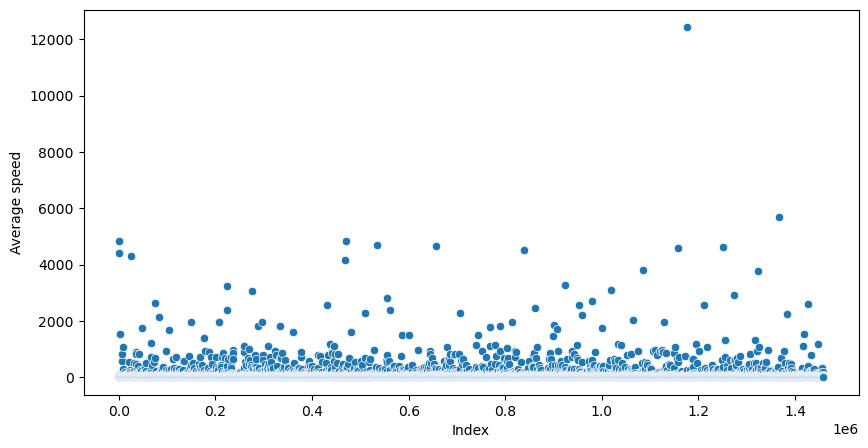

In [98]:
avg_speed = df['total_distance'] / df['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

In [99]:
#Найдите поездки, длительность которых превышает 24 часа
trip_out = df[df['trip_duration'] > 24*60*60]
#Сколько выбросов по признаку длительности поездки вам удалось найти?
trip_out



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events
355003,id1864733,1,2016-01-05 00:19:42+00:00,2016-01-27 11:08:38+00:00,1,-73.789650,40.643559,-73.956810,40.773087,N,...,1635.0,19.0,20.148664,-44.316302,5,-2.8,16.1,5.6,0.0,None
680594,id0369307,1,2016-02-13 22:38:00+00:00,2016-03-08 15:57:38+00:00,2,-73.921677,40.735252,-73.984749,40.759979,N,...,506.4,10.0,5.982487,-62.618646,4,-14.4,16.1,25.9,0.0,None
924150,id1325766,1,2016-01-05 06:14:15+00:00,2016-01-31 01:01:07+00:00,1,-73.983788,40.742325,-73.985489,40.727676,N,...,315.0,6.0,1.635128,-174.969924,6,-11.1,16.1,7.4,0.0,None
978383,id0053347,1,2016-02-13 22:46:52+00:00,2016-03-25 18:18:14+00:00,1,-73.783905,40.648632,-73.978271,40.750202,N,...,1406.9,14.0,19.900661,-55.358997,5,-14.4,16.1,25.9,0.0,None


In [100]:
# Удалить выбросы из набора данных, где поездка превышает 24 часа
df = df[df['trip_duration'] <= 24 * 60 * 60]

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч, и удалите их из данных.

In [101]:
#расчет ср скорости в км
df['avr_speed'] = df['total_distance'] / df['trip_duration'] * 3.6
#выбросы в колонке ср скорости
outliers_speed = df[df['avr_speed'] > 300]
outliers_speed

C:\Users\MSI\AppData\Local\Temp\ipykernel_1284\3611726709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avr_speed'] = df['total_distance'] / df['trip_duration'] * 3.6


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,avr_speed
842,id3263580,2,2016-05-21 12:46:46+00:00,2016-05-21 12:46:49+00:00,2,-73.782372,40.648766,-73.782372,40.648746,N,...,16.0,0.002121,180.000000,5,17.2,14.5,7.4,0.0,None,4393.560
1107,id0729156,2,2016-06-23 13:36:48+00:00,2016-06-23 13:36:50+00:00,3,-73.827660,40.716175,-73.822113,40.711452,N,...,9.0,0.703065,138.321912,5,24.4,12.9,5.6,0.0,None,4848.300
3305,id0210376,1,2016-05-10 14:08:36+00:00,2016-05-10 14:08:42+00:00,1,-73.796432,40.645237,-73.797707,40.645401,N,...,12.0,0.109033,-80.369600,5,16.7,16.1,7.4,0.0,None,1528.500
5992,id3738922,1,2016-02-12 11:33:01+00:00,2016-02-12 11:33:09+00:00,1,-73.781868,40.644676,-73.781822,40.644588,N,...,4.0,0.010493,158.402515,5,-7.2,16.1,7.4,0.0,None,574.515
6777,id2891134,1,2016-05-16 08:20:40+00:00,2016-05-16 08:20:42+00:00,1,-73.963028,40.774895,-73.963020,40.774891,N,...,6.0,0.000770,123.435049,0,8.0,16.1,0.0,0.0,None,808.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426834,id1499313,1,2016-03-11 16:35:29+00:00,2016-03-11 16:35:37+00:00,1,-73.957596,40.758183,-73.957603,40.758183,N,...,13.0,0.000643,-89.999998,0,17.2,16.1,16.7,0.0,None,2610.990
1427152,id2789597,1,2016-05-27 23:50:53+00:00,2016-05-27 23:50:57+00:00,1,-73.977936,40.748436,-73.977974,40.748463,N,...,6.0,0.004375,-47.262314,1,25.6,12.9,9.3,0.0,None,405.900
1433244,id2935356,2,2016-04-26 20:44:01+00:00,2016-04-26 20:44:05+00:00,1,-73.985100,40.768398,-73.985252,40.768749,N,...,6.0,0.041085,-18.225840,1,10.6,8.0,14.8,0.0,None,771.840
1447397,id0374193,1,2016-06-14 06:25:07+00:00,2016-06-14 06:25:19+00:00,1,-73.784531,40.646038,-73.786201,40.645290,N,...,13.0,0.163658,-120.530238,5,15.6,16.1,11.1,0.0,None,1186.650


In [51]:
#удаление выбросов, где скорость превышает 300 км/ч
df = df[df['avr_speed'] <= 300]

# 3. Разведывательный анализ данных

## 3.1  
**длительность поездок в лог.м**


 - Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log).   
 - Является ли полученное распределение нормальным?  
 - Проверьте свою гипотезу с помощью теста Д’Агостино-Пирсона (scipy.stats.normaltest) при уровне значимости a=0.05

In [102]:

#логарифм длительности поездок
df['trip_duration_log'] = np.log(df['trip_duration'])

C:\Users\MSI\AppData\Local\Temp\ipykernel_1284\963060314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_duration_log'] = np.log(df['trip_duration'])


In [103]:
df['trip_duration']

0           455
1           663
2          2124
3           429
4           435
           ... 
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Length: 1458640, dtype: int64

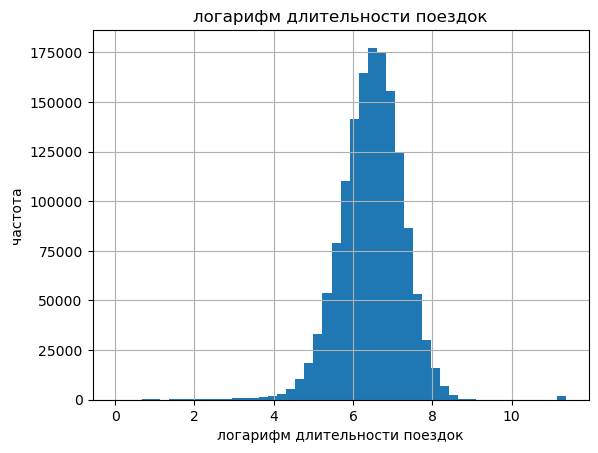

In [104]:
# гистограмма длительности поездок
df['trip_duration_log'].hist(bins=50)
plt.xlabel('логарифм длительности поездок')
plt.ylabel('частота')
plt.title('логарифм длительности поездок')
plt.show()



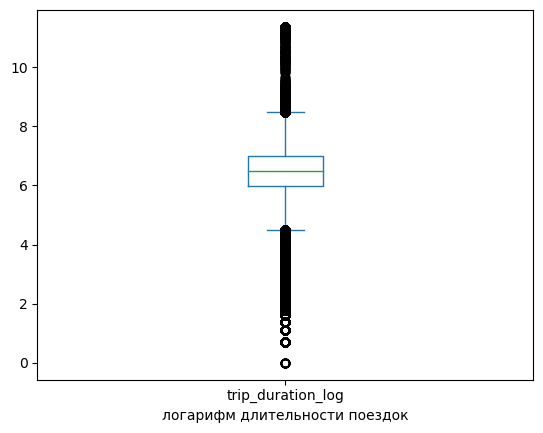

In [105]:
#боксплот длительности поездок
df['trip_duration_log'].plot(kind='box')
plt.xlabel('логарифм длительности поездок')
plt.show()



In [106]:
# Проверить нормальность распределения с помощью теста Д’Агостино-Пирсона
result = normaltest(df['trip_duration_log'])

print('p-value:', result.pvalue)
# уровень значимости
alpha = 0.05

# вывод
if result.pvalue < alpha:
    print('нет, распределение отличное от нормального')
else:
    print('да, распределение нормальное')

p-value: 0.0
нет, распределение отличное от нормального


## Задание 3.2  
**распределение длительности поездки лог.м в зависимости от таксопарка**

Постройте гистограмму и коробчатую диаграмму, которые позволят сравнить распределение длительности поездки  
в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

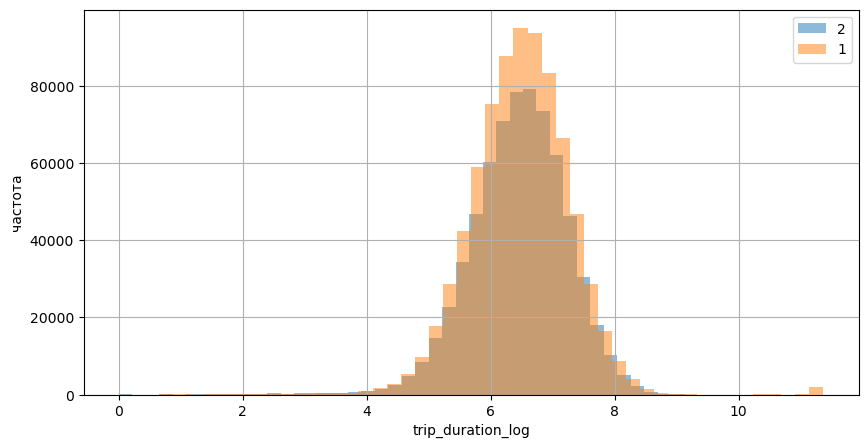

In [107]:
#построение гистограммы 
df.groupby('vendor_id')['trip_duration_log'].hist(bins=50, alpha=0.5, figsize=(10, 5))
plt.xlabel('длительность поездок (логарифмический масштаб)')
plt.xlabel('trip_duration_log')
plt.ylabel('частота')
plt.legend(df['vendor_id'].unique())
plt.show()

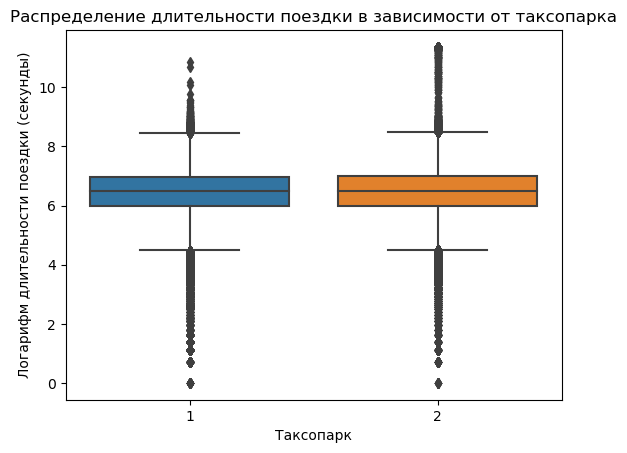

In [110]:
# Построение коробчатой диаграммы

sns.boxplot(x='vendor_id', y='trip_duration_log', data=df)
plt.xlabel('Таксопарк')
plt.ylabel('Логарифм длительности поездки (секунды)')
plt.title('Распределение длительности поездки в зависимости от таксопарка')
plt.show()

**Вывод**  
  
Распределения в группах практически не отличаются, признак vendor_id не имеет значения при определении длительности поездки.    

## Задание 3.3 
**распределение длительности поездки в лог.м. в зависимости от отправки сообщения**

Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log)  
в зависимости от признака отправки сообщения таксопарку (store_and_fwd_flag).

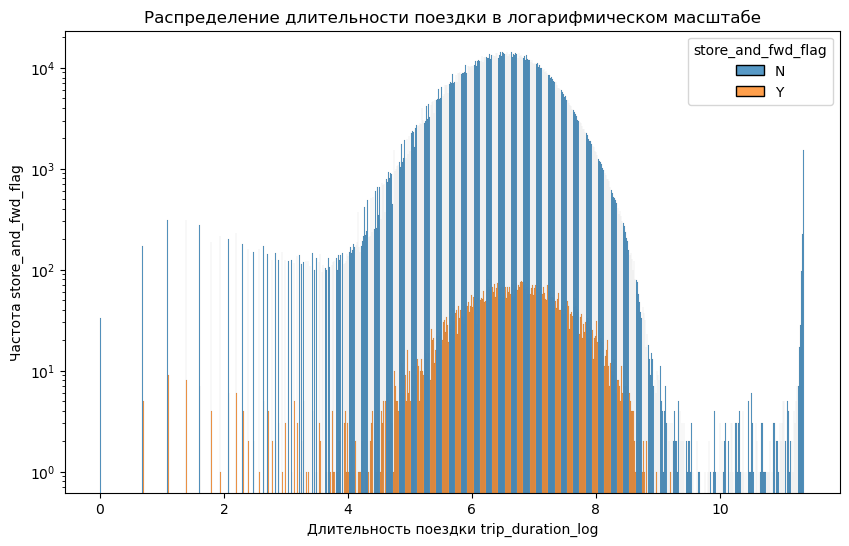

In [117]:
#построение гистограммы 
# Построение гистограммы распределения длительности поездки в логарифмическом масштабе в зависимости от store_and_fwd_flag
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='trip_duration_log', hue='store_and_fwd_flag', log_scale=(False, True), multiple='dodge')
plt.title('Распределение длительности поездки в логарифмическом масштабе')
plt.xlabel('Длительность поездки trip_duration_log')
plt.ylabel('Частота store_and_fwd_flag')
plt.show()

**Вывод**  
  
Распределения в группах значительно отличаются, признак store_and_fwd_flag имеет значение при определении длительности поездки.

## Задание 3.4  
**Построение визуализации**  
  
- распределение количества поездок в зависимости от часа дня;  
- зависимость медианной длительности поездки от часа дня.


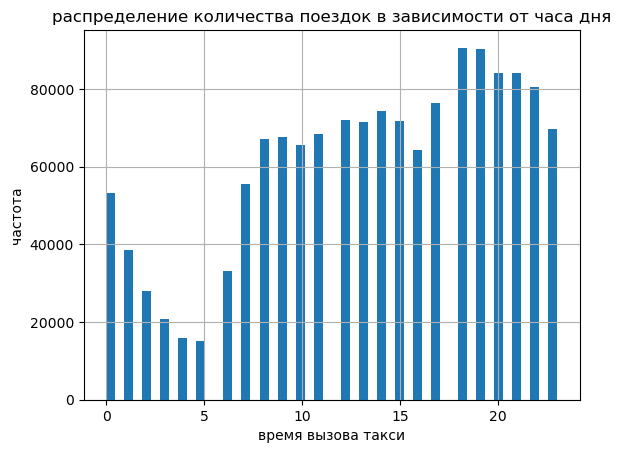

In [118]:
df['pickup_hour'].hist(bins=50)
plt.xlabel('время вызова такси')
plt.ylabel('частота')
plt.title('распределение количества поездок в зависимости от часа дня')
plt.show()


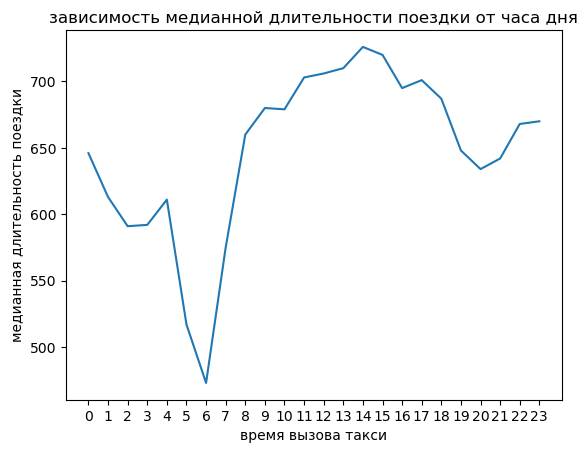

In [119]:
# Группировка данных по часу вызова такси и вычисление медианы длительности поездки для каждой группы
df_median = df.groupby('pickup_hour')['trip_duration'].median().reset_index()

# Построение графика зависимости медианной длительности поездки от часа дня
plt.plot(df_median['pickup_hour'], df_median['trip_duration'])
plt.xlabel('время вызова такси')
plt.ylabel('медианная длительность поездки')
plt.title('зависимость медианной длительности поездки от часа дня')

plt.xticks(range(24), range(24))


plt.show()

**Выводы:**  
  
 - Реже всего такси заказывают с 4:00 до 6:00.
 - Пик медианной длительности поездок наблюдается с 11:00 до 16:00.

## Задание 3.5.  
  
Постройте две визуализации:  
  
 -  распределение количества поездок в зависимости от часа дня;  
 - зависимость медианной длительности поездки от часа дня.

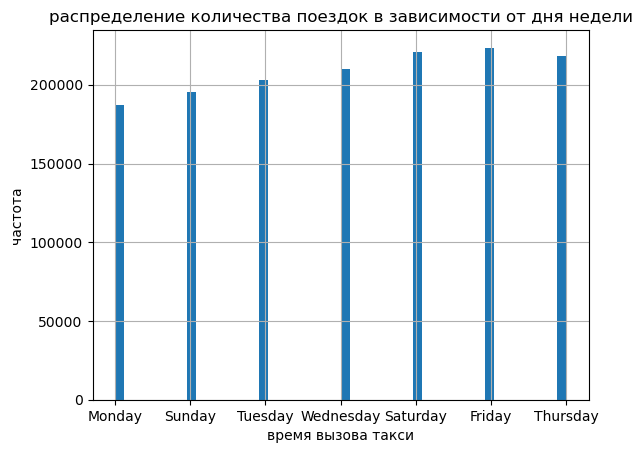

In [120]:
#распределение количества поездок в зависимости от дня недели
df['pickup_day_of_week'].hist(bins=50)
plt.xlabel('время вызова такси')
plt.ylabel('частота')
plt.title('распределение количества поездок в зависимости от дня недели')
plt.show()

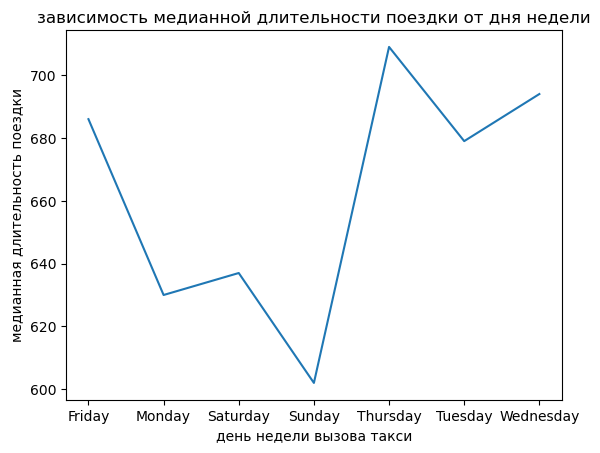

In [121]:
#зависимость медианной длительности поездки от часа дня.
# Группировка данных по часу вызова такси и вычисление медианы длительности поездки для каждой группы
df_median = df.groupby('pickup_day_of_week')['trip_duration'].median().reset_index()

# Построение графика зависимости медианной длительности поездки от часа дня
plt.plot(df_median['pickup_day_of_week'], df_median['trip_duration'])
plt.xlabel('день недели вызова такси')
plt.ylabel('медианная длительность поездки')
plt.title('зависимость медианной длительности поездки от дня недели')




plt.show()

**Выводы:**  
  
- В пятницу совершается больше всего поездок.
- В воскресенье медианная длительность поездок наименьшая.

## Задание 3.6  
  
 **просмотр временных характеристик**

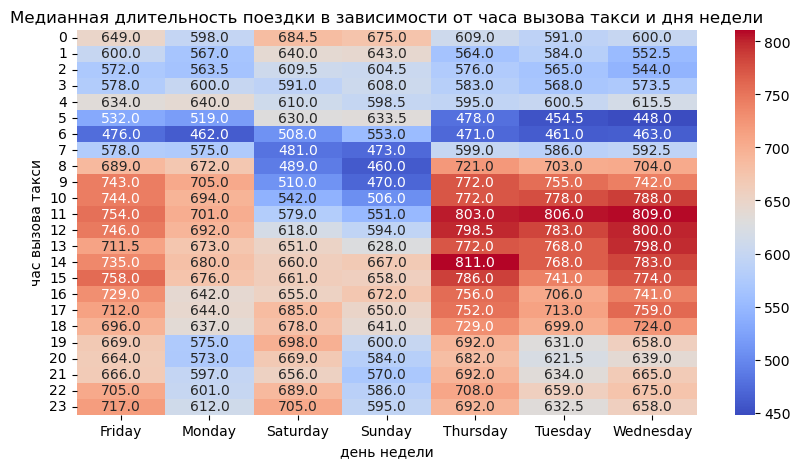

In [122]:
# Группировка данных по часу вызова такси (pickup_hour) и дню недели (pickup_day_of_week) и вычисление медианы длительности поездки (trip_duration) для каждой группы
df_pivot = df.pivot_table(index='pickup_hour', columns='pickup_day_of_week', values='trip_duration', aggfunc='median')

# Визуализация сводной таблицы с помощью тепловой карты
plt.figure(figsize=(10,5))
sns.heatmap(df_pivot, annot=True, fmt='.1f', cmap='coolwarm')
plt.xlabel('день недели')
plt.ylabel('час вызова такси')
plt.title('Медианная длительность поездки в зависимости от часа вызова такси и дня недели')
plt.show()

**Выводы:**  
  
- Самые прдолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов.
- Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня.

## Задание 3.7  
  
**Постройте две диаграммы рассеяния (scatter-диаграммы):**

 - географическое расположение точек начала поездок (pickup_longitude, pickup_latitude);  
 - географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

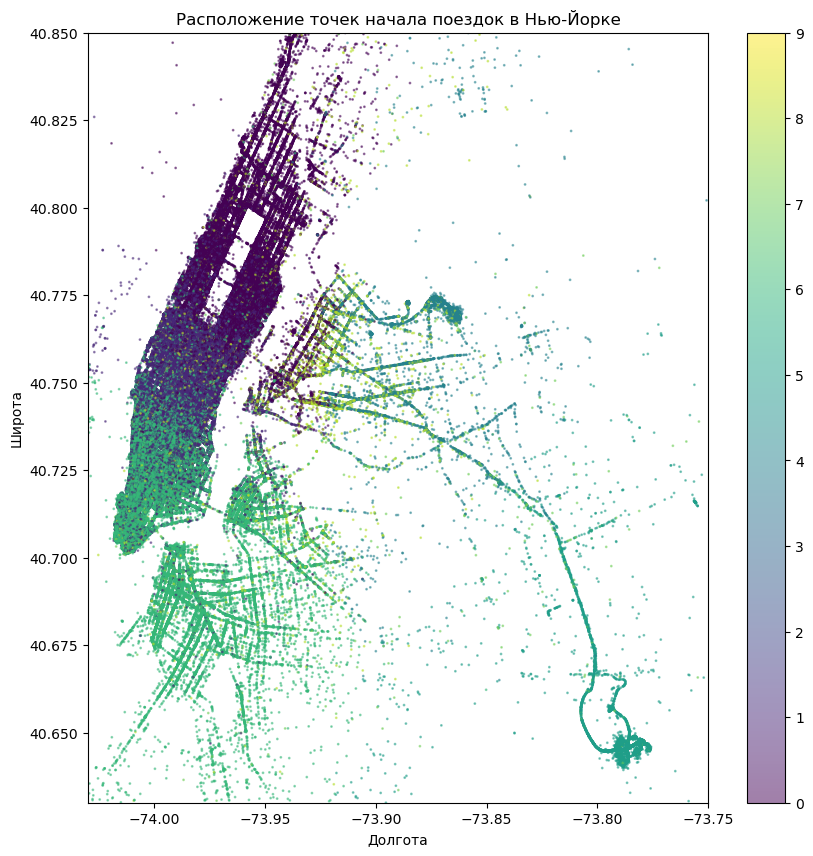

In [123]:
# Ограничения на границы осей абсцисс и ординат
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Фильтрация данных по границам Нью-Йорка
df_nyc = df[(df['pickup_longitude'] >= city_long_border[0]) & (df['pickup_longitude'] <= city_long_border[1]) &
            (df['pickup_latitude'] >= city_lat_border[0]) & (df['pickup_latitude'] <= city_lat_border[1])]

# Диаграмма рассеяния расположения точек начала поездок
plt.figure(figsize=(10, 10))
plt.scatter(df_nyc['pickup_longitude'], df_nyc['pickup_latitude'], s=1, c=df_nyc['geo_cluster'], alpha=0.5)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Расположение точек начала поездок в Нью-Йорке')
plt.colorbar()
plt.show()



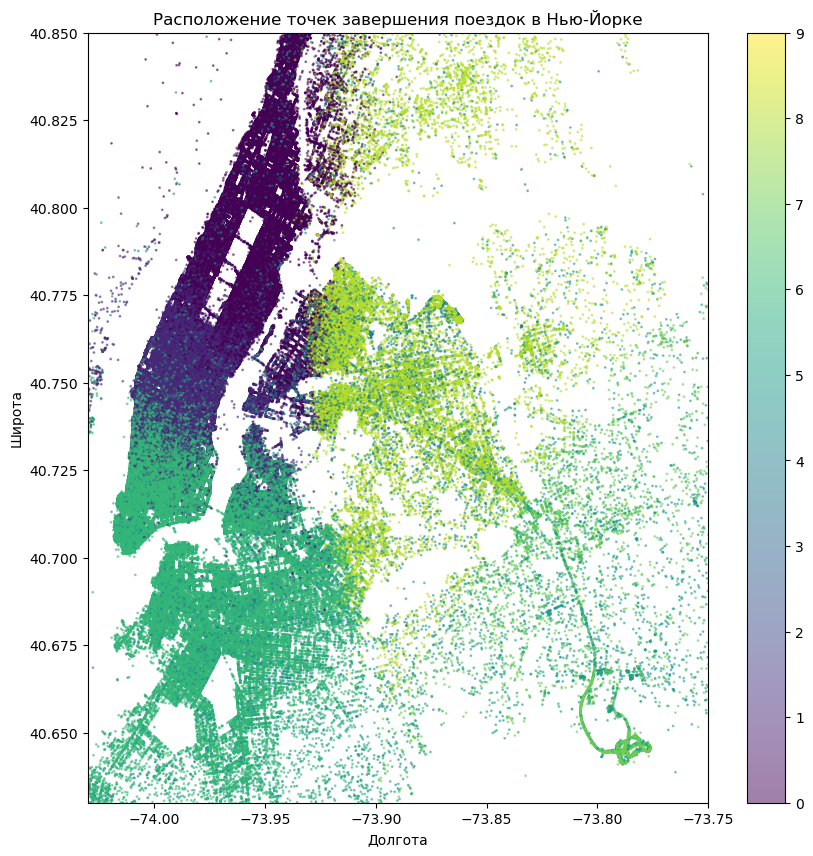

In [124]:
# Диаграмма рассеяния расположения точек завершения поездок
plt.figure(figsize=(10, 10))
plt.scatter(df_nyc['dropoff_longitude'], df_nyc['dropoff_latitude'], s=1, c=df_nyc['geo_cluster'], alpha=0.5)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Расположение точек завершения поездок в Нью-Йорке')
plt.colorbar()
plt.show()

**Выводы:**  
  
- Три кластера (из десяти) не попало на диаграммы (находятся за границами Нью-Йорка).

# 4. Отбор и преобразование признаков

In [128]:
#удаление лишней колонки

df = df.drop('avr_speed', axis=1)



print('Shape of data: {}'.format(df.shape))
print('Columns: {}'.format(df.columns))

KeyError: "['avr_speed'] not found in axis"

In [ ]:
#создание копии дф
train_data = df.copy()
train_data.head()

## 4.1 избыточные признаки

1. **Какой из признаков является уникальным для каждой поездки и не несёт полезной информации в определении её продолжительности?**   
 
колонка `id`

2. **Утечка данных (data leak) — это...**  
  
ситуация, в которой данные используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях.

3. Наличие какого из указанных ниже признаков в обучающем наборе данных создаёт утечку данных?  
  
`dropoff_datetime`

In [129]:
drop_columns = ['id', 'dropoff_datetime', 'pickup_datetime', 'pickup_date']

train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

KeyError: "['id', 'dropoff_datetime', 'pickup_datetime', 'pickup_date'] not found in axis"

## Задание 4.2  
  
 **кодирование признаков**  
   
   Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.
Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

In [130]:
# Закодировать признак vendor_id в таблице train_data
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)



In [131]:
# Закодировать признак store_and_fwd_flag в таблице train_data
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

In [134]:
#Рассчитайте среднее по закодированному столбцу vendor_id
print('cреднее по закодированному столбцу vendor_id = ',round(train_data['vendor_id'].mean(), 2))


cреднее по закодированному столбцу vendor_id =  0.53


In [135]:
#Рассчитайте среднее по закодированному столбцу store_and_fwd_flag.
print('среднее по закодированному столбцу store_and_fwd_flag = ', round(train_data['store_and_fwd_flag'].mean(), 3))

среднее по закодированному столбцу store_and_fwd_flag =  0.006


## Задание 4.3  
признаки (pickup_day_of_week, geo_cluster, events) являются номинальными.  Для них отлично подойдёт однократное кодирование. 

Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder() из библиотеки sklearn. В качестве значения параметра drop возьмите 'first', чтобы удалять первый бинарный столбец и тем самым не создавать излишних признаков.

In [136]:
from sklearn.preprocessing import OneHotEncoder

# Создайте объект кодировщика
ohe = OneHotEncoder(drop='first', sparse_output=False)



In [137]:
data_onehot=train_data[['pickup_day_of_week', 'geo_cluster', 'events']]

In [138]:
#идентифицируем параметр преобразования
ohe.fit(data_onehot)

OneHotEncoder(drop='first', sparse_output=False)

In [139]:
#применение преобразований с заданными параметрами на данных
data=ohe.transform(data_onehot)

In [140]:
 #предполагаемые названия признаков
ohe.get_feature_names_out()

array(['pickup_day_of_week_Monday', 'pickup_day_of_week_Saturday',
       'pickup_day_of_week_Sunday', 'pickup_day_of_week_Thursday',
       'pickup_day_of_week_Tuesday', 'pickup_day_of_week_Wednesday',
       'geo_cluster_1', 'geo_cluster_2', 'geo_cluster_3', 'geo_cluster_4',
       'geo_cluster_5', 'geo_cluster_6', 'geo_cluster_7', 'geo_cluster_8',
       'geo_cluster_9', 'events_None', 'events_Rain', 'events_Snow'],
      dtype=object)

In [141]:
#добавление новых признаков в дф
data_onehot[ohe.get_feature_names_out()] = data

C:\Users\MSI\AppData\Local\Temp\ipykernel_1284\1316346535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_onehot[ohe.get_feature_names_out()] = data
C:\Users\MSI\AppData\Local\Temp\ipykernel_1284\1316346535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_onehot[ohe.get_feature_names_out()] = data
C:\Users\MSI\AppData\Local\Temp\ipykernel_1284\1316346535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [142]:
data_onehot=data_onehot.drop(['pickup_day_of_week', 'geo_cluster', 'events'], axis=1)

In [147]:
#количество полученных столбцов
data_onehot.shape

(1458640, 18)

In [144]:
#Добавим полученную таблицу с закодированными признаками:
train_data = train_data.join(data_onehot)

In [145]:
#удаляем лишние категориальные колонки из дф
train_data=train_data.drop(['pickup_day_of_week', 'geo_cluster', 'events'], axis=1)

## формирование матрицы наблюдений

сформируем матрицу наблюдений X,  
вектор целевой переменной y и его логарифм y_log.    
В матрицу наблюдений войдут все столбцы из таблицы с поездками, за исключением целевого признака trip_duration   
и его логарифмированной версии trip_duration_log:

In [150]:
x = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log.  
  
Далее нам необходимо определить тип валидации — схему, по которой мы будем оценивать качество построенных моделей.   

Так как наш набор данных довольно большой (почти 1.5 миллиона наблюдений), то мы свободно можем использовать hold-out-валидацию.   
Использование k-fold-валидации и тем более leave-one-out-валидации при таком объёме данных будет избыточным и времязатратным.  

Разобьём выборку на обучающую и валидационную в соотношении 67/33:  

In [151]:
x_train, x_valid, y_train_log, y_valid_log = train_test_split(x, y_log, test_size=0.33, random_state=42)

## Задание 4.4.

С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.  
  
В тренировочной и валидационной выборке оставьте только полученные 25 признаков, откинув ненужные. Далее мы будем работать и строить модели на отобранных признаках.

In [152]:
train_data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_holiday,...,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,11,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,19,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,1,4,-73.982201,40.745522,-73.994911,40.740170,0,778,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1458640,0,1,-74.000946,40.747379,-73.970184,40.796547,0,655,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1458641,1,1,-73.959129,40.768799,-74.004433,40.707371,0,764,6,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1458642,0,1,-73.982079,40.749062,-73.974632,40.757107,0,373,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [153]:
# Отоберите 25 лучших признаков для предсказания целевой переменной в логарифмическом масштабе
selector = SelectKBest(score_func = f_regression, k=25)
selector.fit(x_train, y_train_log)

SelectKBest(k=25, score_func=<function f_regression at 0x000001EAB50EA8E0>)

In [154]:

# Получите список отобранных признаков
selected_features = selector.get_support(indices=True)
selected_features_names = [x_train.columns[i] for i in selected_features]

In [155]:
selected_features_names

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_hour',
 'pickup_holiday',
 'total_distance',
 'total_travel_time',
 'number_of_steps',
 'haversine_distance',
 'temperature',
 'pickup_day_of_week_Monday',
 'pickup_day_of_week_Saturday',
 'pickup_day_of_week_Sunday',
 'pickup_day_of_week_Thursday',
 'pickup_day_of_week_Tuesday',
 'pickup_day_of_week_Wednesday',
 'geo_cluster_1',
 'geo_cluster_4',
 'geo_cluster_5',
 'geo_cluster_7',
 'geo_cluster_8']

In [156]:
# Оставьте только отобранные признаки в тренировочной и валидационной выборках
x_train = x_train[x_train.columns[selected_features]]
x_valid = x_valid[x_valid.columns[selected_features]]

## Задание 4.5

Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация — на обучающей и валидационной.

In [159]:

scaler = MinMaxScaler()

# Обучите нормализатор на обучающей выборке
scaler.fit(x_train)


MinMaxScaler()

In [160]:
# Трансформируйте обучающую и валидационную выборки
x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)

In [161]:
# cреднее арифметическое для первого предиктора из валидационной выборки. 
avg_first_predictor = round(x_valid[:, 0].mean(), 2)
avg_first_predictor

0.53

# сохранение полученного датасета

In [162]:
 df.to_csv('train_data.csv', sep='\t', index=False)

In [164]:
#создание тренировочной и тестовой выборок в дф
x_train_df=pd.DataFrame(data=x_train, columns=selected_features_names)
x_valid_df=pd.DataFrame(data=x_valid, columns=selected_features_names)